In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns
from matplotlib import pyplot as plt 

%matplotlib inline
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

1.  Import the spam dataset and print the first six rows.  

In [ ]:
#Read in the file and the data set
from google.colab import files
uploaded = files.upload()

Saving spam_dataset.csv to spam_dataset (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam_dataset.csv']))

In [ ]:
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

The three variables "word_freq_order:", ""word_freq_free:", and ""word_freq_credit:" might be important predictors in a model of spam as I think they might include "order", "free", "credit" frequently in their emails. 

"order": Since spam concept includes advertisement for product/web, I think they might want the reader to purchase their products by making an order. So the word "order" might appear frequently.

"free": Spam might attract the reader to read or make purchases by giving them free gift, free shipping, etc. So the word "free" might appear frequently.

"credit": Spam might attract the reader to make purchases by giving them extra credits which can be used in the future, or helping increase their credit by some methods. So the word "credit" might appear frequently.

3.  Visualize the univariate distribution of each of the variables in the previous question.  

count    4601.000000
mean        0.090067
std         0.278616
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.260000
Name: word_freq_order:, dtype: float64


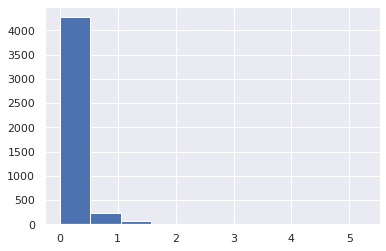

In [ ]:
print(df['word_freq_order:'].describe())
df['word_freq_order:'].hist()

count    4601.000000
mean        0.248848
std         0.825792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max        20.000000
Name: word_freq_free:, dtype: float64


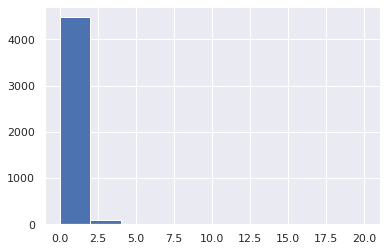

In [ ]:
print(df['word_freq_free:'].describe())
df['word_freq_free:'].hist()

count    4601.000000
mean        0.085577
std         0.509767
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.180000
Name: word_freq_credit:, dtype: float64


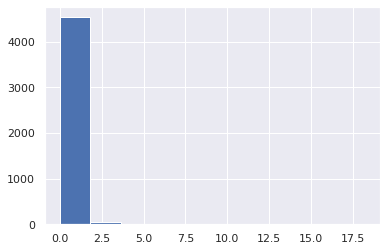

In [ ]:
print(df['word_freq_credit:'].describe())
df['word_freq_credit:'].hist()

4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

If we want to focus on supervised learning models in classification:
1. K Nearest Neighbors
2. Logistic Regression
3. Random Forest
4. Decision Tree
5. Support Vector Machines
6. Bagging

5. Describe the importance of training and test data.  Why do we separate data into these subsets?

When we try to learn something, we split our data into two subsets: training data and test data. They play different role in Machine Learning, but both of them are important for us to learn the dataset. Training data is used to train or fit the model, while testing data is used to check how accurate the model is.

6. What is k-fold cross validation and what do we use it for?

k-fold cross validation: Split the observation into k subset randomly. Each subset can be used as a test data set. When a specific subset is used as a test set, the other k-1 subsets can be treated as a training data set. Then we can fit model on the training data set, and test the model with the test data set. 

We use k-fold cross validation as it provides us a less biased estimate of the model compare to simple split method. 

(https://machinelearningmastery.com/k-fold-cross-validation/)

7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified: Ensure relative class frequencies in each fold reflect relative class frequencies on the whole dataset. (Class 3 slides: Intro to supervised learning)

Instead of doing random sampling, stratified k-fold cross validation uses stratified sampling.

8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.

In [ ]:
# Split the data into training and test subset
y = df['spam']
print(y)

X = df.loc[:, lambda df:["word_freq_order:","word_freq_free:","word_freq_credit:"]]
print(X)

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64
      word_freq_order:  word_freq_free:  word_freq_credit:
0                 0.00             0.32               0.00
1                 0.00             0.14               0.00
2                 0.64             0.06               0.32
3                 0.31             0.31               0.00
4                 0.31             0.31               0.00
...                ...              ...                ...
4596              0.00             0.00               0.00
4597              0.00             0.00               0.00
4598              0.00             0.00               0.00
4599              0.00             0.00               0.00
4600              0.00             0.00               0.00

[4601 rows x 3 columns]


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(4601, 3)


(3450, 3)

In [ ]:
# Use KNN model
# First, choose k=5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 5, knn score=", knn.score(X_test, y_test))

y_pred = knn.predict(X_test) # y_pred includes your predictions

# Choose k = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 10, knn score =" , knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

# Choose k = 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 15, knn score =" , knn.score(X_test, y_test))
y_pred = knn.predict(X_test)


k = 5, knn score= 0.3831450912250217
k = 10, knn score = 0.8192875760208514
k = 15, knn score = 0.8158123370981755


As we can see from the previous knn score, when k = 15, knn score is the highest. So we will choose k = 15 in the KNN model.

In [ ]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)

from statistics import mean 

print("KFold with 5:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), X_train, y_train, cv=kfold))))

kfold = KFold(n_splits=10)

from statistics import mean 

print("KFold with 10:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), X_train, y_train, cv=kfold))))



KFold with 5:
0.7915942028985508
KFold with 10:
0.7921739130434783


Here, I will choose n_splits=10 as the parameter of KFold, as it has a better cross_val_score. 

Also, k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance.(https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/#:~:text=The%20key%20configuration%20parameter%20for,evaluate%20models%20is%20k%3D10.)

The best score that KNN model get is 0.8063768115942029.

9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg.coef_))


print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

logreg


logreg = LogisticRegression(penalty='l2').fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg.coef_))


print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

logreg


logreg .coef_: [[1.47909829 2.06454786 3.46998829]]
Training set score: 0.748
Test set score: 0.784
logreg.predict: [0 0 1 ... 0 0 0]
logreg .coef_: [[1.47001176 2.03167546 2.87959564]]
Training set score: 0.749
Test set score: 0.782
logreg.predict: [0 0 1 ... 0 0 0]


LogisticRegression()

In [ ]:
# Use k-fold cross validation

kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold))))

kfold = KFold(n_splits=10)

from statistics import mean 

print("KFold with 10:\n{}".format(
mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold))))

KFold with 5:
0.7515942028985507
KFold with 10:
0.7495652173913043


Here, we can see that k-fold with 5 has a better cross-validation score. So I will choose k-fold with 5.

The accuracy of Logistic Regression model is 0.752, and the accuracy of k-fold with 5 is 0.7478260869565218. The best score that Logistic Regression get is 0.752, which is lower than the previous model.

10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

model = tree.fit(X,y)

model.score(X_test, y_test)


0.8549087749782798

In [ ]:
# Use k-fold cross validation

kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=kfold))))

kfold = KFold(n_splits=10)

from statistics import mean 

print("KFold with 10:\n{}".format(
mean(cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=kfold))))

KFold with 5:
0.7756521739130434
KFold with 10:
0.778840579710145


Here, I will choose n_splits=10 as the parameter of KFold, as it has a better cross_val_score.

Also, k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance.(https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/#:~:text=The%20key%20configuration%20parameter%20for,evaluate%20models%20is%20k%3D10.)

The accuracy of Logistic Regression model is 0.8427454387489139. With K-fold k = 10, the accuracy is 0.7808695652173914. So the best score that Logistic Regression model get is 0.8427454387489139. This is better than the previous models.

11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

#Using make_blobs toy dataset above
model.fit(X,y)
ypred = model.predict(X_test)
print("n_estimater = 100, score = ", model.score(X_test,y_test))

model = RandomForestClassifier(n_estimators=200)

#Using make_blobs toy dataset above
model.fit(X,y)
ypred = model.predict(X_test)
print("n_estimater = 200, score = ", model.score(X_test,y_test))

model = RandomForestClassifier(n_estimators=300)

#Using make_blobs toy dataset above
model.fit(X,y)
ypred = model.predict(X_test)
print("n_estimater = 300, score = ", model.score(X_test,y_test))

model = RandomForestClassifier(n_estimators=1000)

#Using make_blobs toy dataset above
model.fit(X,y)
ypred = model.predict(X_test)
print("n_estimater = 1000, score = ", model.score(X_test,y_test))




n_estimater = 100, score =  0.8566463944396178
n_estimater = 200, score =  0.8531711555169418
n_estimater = 300, score =  0.8523023457862728
n_estimater = 1000, score =  0.8523023457862728


Here, we can find out that when n_estimater = 1000, the model has the highest score. So I will choose n_estimater to be 1000.

In [ ]:
# Using k-fold cross-validation
kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(RandomForestClassifier(n_estimators=200), X_train, y_train, cv=kfold))))

kfold = KFold(n_splits=10)

from statistics import mean 

print("KFold with 10:\n{}".format(
mean(cross_val_score(RandomForestClassifier(n_estimators=200), X_train, y_train, cv=kfold))))


KFold with 5:
0.7846376811594203
KFold with 10:
0.7855072463768116


Here, I will choose n_splits=10 as the parameter of KFold, as it has a better cross_val_score.

Also, k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance.(https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/#:~:text=The%20key%20configuration%20parameter%20for,evaluate%20models%20is%20k%3D10.)

The accuracy of Random Forest Classifier is 0.840139009556907 when n_estimater = 1000. With k-fold = 10, the accuracy is 0.7936231884057972. The best score of Random Forest Classifier is 0.840139009556907. This is lower than the Logistic Regression model.

12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?



I will now add three variables to the model: "word_freq_receive:", "word_freq_our:", "word_freq_mail:", and use the Logistic Regression Model.

In [ ]:
# Add the three variables to the model
y1 = df['spam']
print(y1)

X1 = df.loc[:, lambda df:["word_freq_order:","word_freq_free:","word_freq_credit:","word_freq_receive:", "word_freq_our:", "word_freq_mail:"]]
print(X1)


0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64
      word_freq_order:  word_freq_free:  word_freq_credit:  \
0                 0.00             0.32               0.00   
1                 0.00             0.14               0.00   
2                 0.64             0.06               0.32   
3                 0.31             0.31               0.00   
4                 0.31             0.31               0.00   
...                ...              ...                ...   
4596              0.00             0.00               0.00   
4597              0.00             0.00               0.00   
4598              0.00             0.00               0.00   
4599              0.00             0.00               0.00   
4600              0.00             0.00               0.00   

      word_freq_receive:  word_freq_our:  word_freq_mail:  
0                   0.00            0.32      

In [ ]:
# Train test split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

print(X1.shape)
X1_train.shape

(4601, 6)


(3450, 6)

In [ ]:
#Logistic Regression

logreg = LogisticRegression(penalty='none').fit(X1_train, y1_train)

print("logreg .coef_: {}".format(logreg.coef_))


print("Training set score: {:.3f}".format(logreg.score(X1_train, y1_train)))
print("Test set score: {:.3f}".format(logreg.score(X1_test, y1_test)))


predicted_vals = logreg.predict(X1_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

logreg

logreg .coef_: [[1.82485897 1.28933893 2.29945436 2.28592648 0.79260328 0.33568805]]
Training set score: 0.774
Test set score: 0.759
logreg.predict: [0 0 1 ... 0 0 0]


LogisticRegression(penalty='none')

In [ ]:
# Use k-fold cross validation

kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(LogisticRegression(), X1_train, y1_train, cv=kfold))))

kfold = KFold(n_splits=10)

from statistics import mean 

print("KFold with 10:\n{}".format(
mean(cross_val_score(LogisticRegression(), X1_train, y1_train, cv=kfold))))

KFold with 5:
0.7753623188405797
KFold with 10:
0.7727536231884058


No. This time the highest score of the model is 0.770 which is lower than the previous model.

13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?

**KNN model**

In [ ]:
# Use KNN model
# First, choose k=5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 5, knn score=", knn.score(X1_test, y1_test))

y_pred = knn.predict(X1_test) # y_pred includes your predictions

# Choose k = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X1_train, y1_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 10, knn score =" , knn.score(X1_test, y1_test))
y_pred = knn.predict(X1_test)

# Choose k = 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X1_train, y1_train)

#Print accuracy rounded to two digits to the right of decimal
print("k = 15, knn score =" , knn.score(X1_test, y1_test))
y_pred = knn.predict(X1_test)

k = 5, knn score= 0.8053866203301477
k = 10, knn score = 0.8010425716768028
k = 15, knn score = 0.787141615986099


Here, choose k=5 since it has the highest score.

In [ ]:
# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X1_train, y1_train, cv=kfold))))

kfold = KFold(n_splits=10)

print("KFold with 10:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X1_train, y1_train, cv=kfold))))

KFold with 5:
0.8173913043478261
KFold with 10:
0.8202898550724638


The best score of KNN is 0.8188405797101449.

**Random Forest**

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

#Using make_blobs toy dataset above
model.fit(X1,y1)
ypred = model.predict(X1_test)
print("n_estimater = 100, score = ", model.score(X1_test,y1_test))

model = RandomForestClassifier(n_estimators=200)

#Using make_blobs toy dataset above
model.fit(X1,y1)
ypred = model.predict(X1_test)
print("n_estimater = 200, score = ", model.score(X1_test,y1_test))

model = RandomForestClassifier(n_estimators=300)

#Using make_blobs toy dataset above
model.fit(X1,y1)
ypred = model.predict(X1_test)
print("n_estimater = 300, score = ", model.score(X1_test,y1_test))

model = RandomForestClassifier(n_estimators=1000)

#Using make_blobs toy dataset above
model.fit(X1,y1)
ypred = model.predict(X1_test)
print("n_estimater = 1000, score = ", model.score(X1_test,y1_test))

n_estimater = 100, score =  0.9061685490877498
n_estimater = 200, score =  0.9026933101650738
n_estimater = 300, score =  0.9035621198957429
n_estimater = 1000, score =  0.9035621198957429


Here, choose n_estimater = 300 since it has the highest score.

In [ ]:
# Using k-fold cross-validation
kfold = KFold(n_splits=5)

print("KFold with 5:\n{}".format(
mean(cross_val_score(RandomForestClassifier(n_estimators=300), X1_train, y1_train, cv=kfold))))

kfold = KFold(n_splits=10)

print("KFold with 10:\n{}".format(
mean(cross_val_score(RandomForestClassifier(n_estimators=300), X1_train, y1_train, cv=kfold))))

KFold with 5:
0.8156521739130435
KFold with 10:
0.8205797101449276


The best score of Random Forest is 0.9044309296264118.

**Decision Tree**

In [ ]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()

model = tree.fit(X1,y1)

model.score(X1_test, y1_test)

0.9026933101650738

In [ ]:
# Use k-fold cross validation

kfold = KFold(n_splits=5) # add a comment on why you chose this specific parameter. 

print("KFold with 5:\n{}".format(
mean(cross_val_score(DecisionTreeClassifier(), X1_train, y1_train, cv=kfold))))

kfold = KFold(n_splits=10) # add a comment on why you chose this specific parameter.

print("KFold with 10:\n{}".format(
mean(cross_val_score(DecisionTreeClassifier(), X1_train, y1_train, cv=kfold))))

KFold with 5:
0.8049275362318841
KFold with 10:
0.8098550724637681


The best score of Decision Tree is 0.9061685490877498.

Overall, I will choose Decision Tree classifier as the final model, without k-fold. This model has the highest score with the 6 variables.

14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I think the the word "shop" might also be a word that appears frequently in spam emails as spam emails always ask people to buy something. So the variable "word_freq_shop" might increase the final model's predictive power.

15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

Supervised Learning Models:
1. K Nearest Neighbors:KNN
2. Ridge Regression
3. Lasso Regression
4. Linear Regression
5. Logistic Regression
6. Support Vector Machines
7. Random Forests
8. Decision Tree
9. Bagging